# Experiment 02: Influence of weight coefficients

In [1]:
%matplotlib inline

import os
import sys
import copy
import time
import pickle
from array import array
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

## Loading data 2D

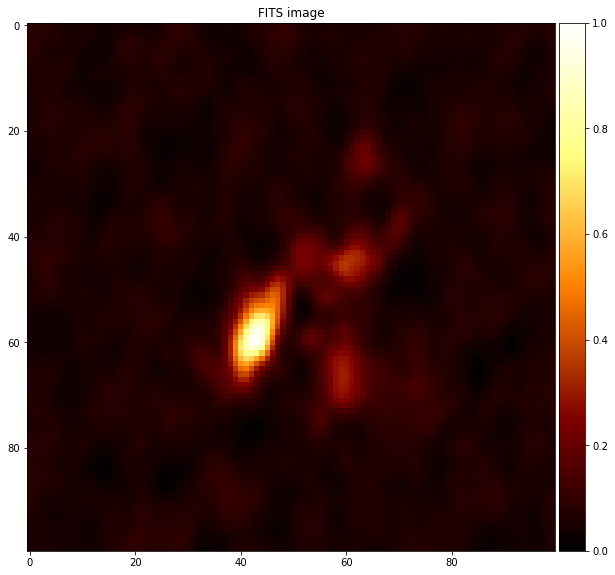

In [2]:
"""
Loading data
"""

fits_path = '../data/images/Orion.cont.image.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

In [3]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

/Users/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


<function graph.thresholded_image_plot>

## `Case 1 `:   $\alpha_1 = 0$ and $\alpha_2 =0$

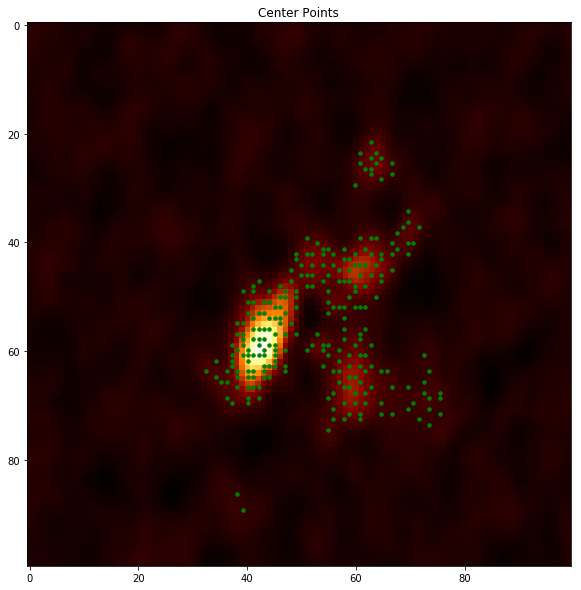

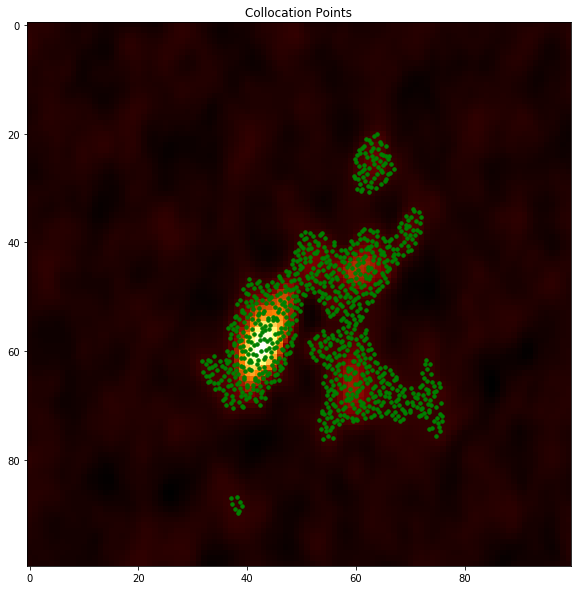


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100113

Residual stats:
Residual RMS: 0.10076603081531905
Residual Variance: 1.6285513668466914e-05
Residual Entropy: 7.186165370444128
Added Flux: -0.0
Total elapsed time: 288.8337800502777 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03522534164425995
Mean min distance between collocation and center points: 0.009674622878690708

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.06737182869435838
Max min distance in the (standarized) parameters space: 0.7043636076149392


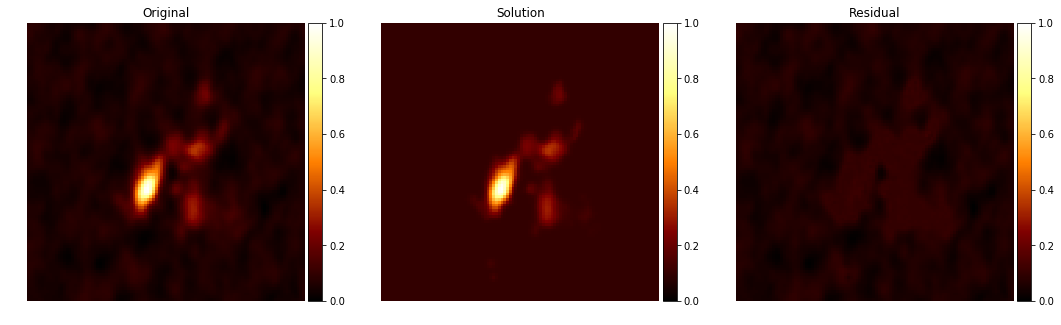

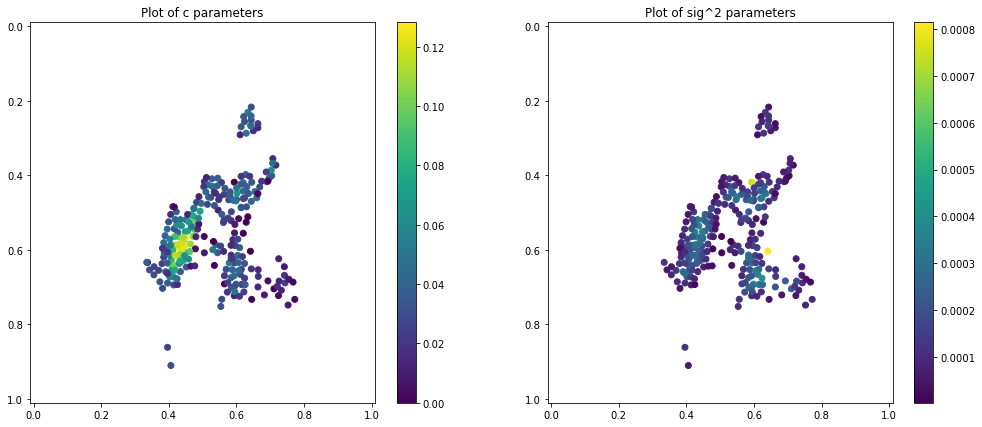

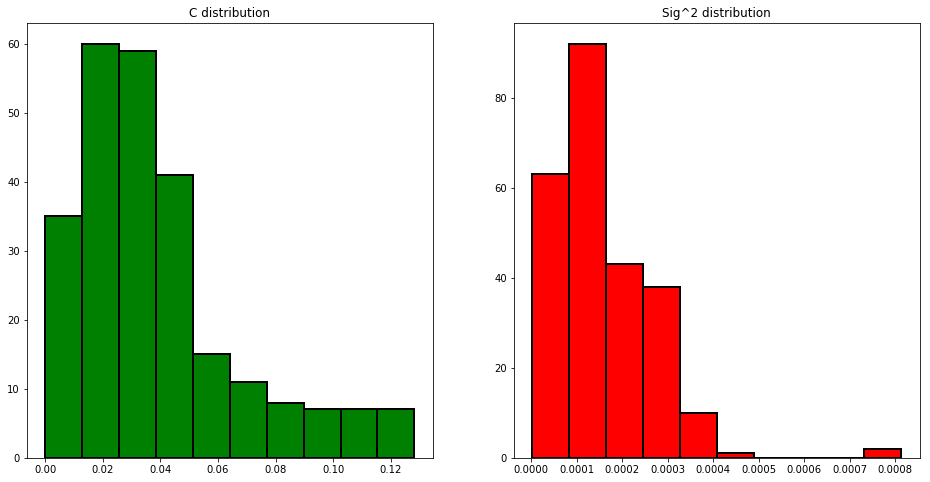

In [4]:
# common parameters
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig

# number of points of each type
Nb = 50
Nc = 250
Ne = 4*Nc-Nb

# points generation
center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
boundary_points = boundary_generation(Nb)

# right format
xc = center_points[:,0]
yc = center_points[:,1]
xe = collocation_points[:,0]
ye = collocation_points[:,1]
xb = boundary_points[:,0]
yb = boundary_points[:,1]

## visualizing the choosen points
points_plot(data, center_points=center_points, title="Center Points")
points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
#c0, sig0 = estimate_initial_guess(center_points, f, R=0.009, method='mean_dist')
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')
#c0, sig0 = _estimate_initial_guess(dfunc, data, center_points, base_level)


#solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#params_plot(c0, sig0, xc, yc)
#params_distribution_plot(c0, sig0)
elm01 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=0., lamb1=1., b=0., lamb2=1.,
                d1psi1=d1psi, d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)

nfev = 100*(len(elm01.get_params())+1)
elm_solver(elm01, method='standard', max_nfev=nfev)

## `Case 2 `:   $\alpha_1 = 1.$ and $\alpha_2 =0$

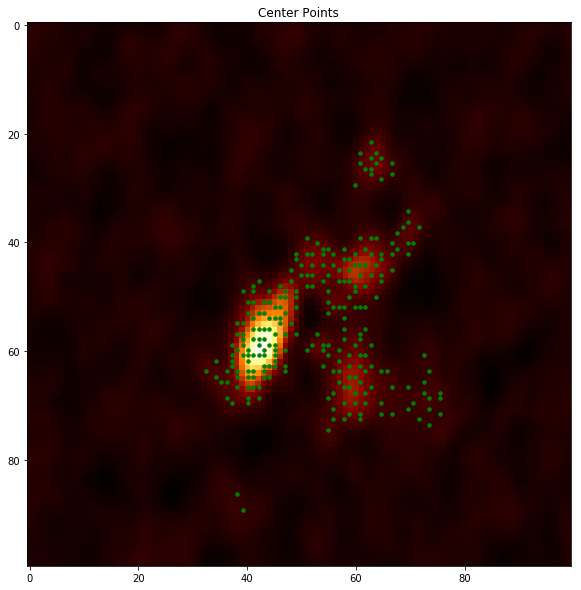

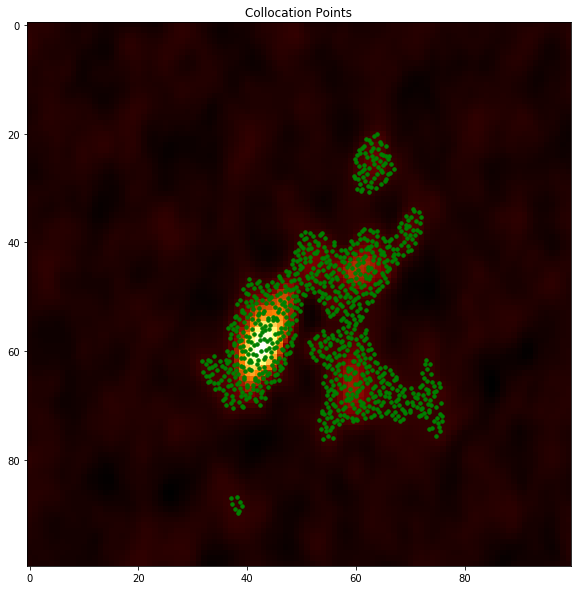


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100135

Residual stats:
Residual RMS: 0.1369882139326206
Residual Variance: 0.0015504840211555601
Residual Entropy: 6.929740004618252
Added Flux: 0.025062200170944016
Total elapsed time: 295.654100894928 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03003543599854681
Mean min distance between collocation and center points: 0.009992496892655182

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.05184822059710484
Max min distance in the (standarized) parameters space: 0.4437798032066161


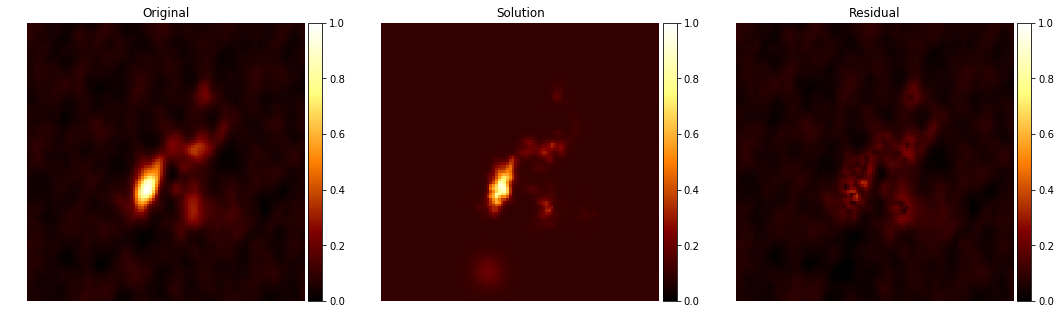

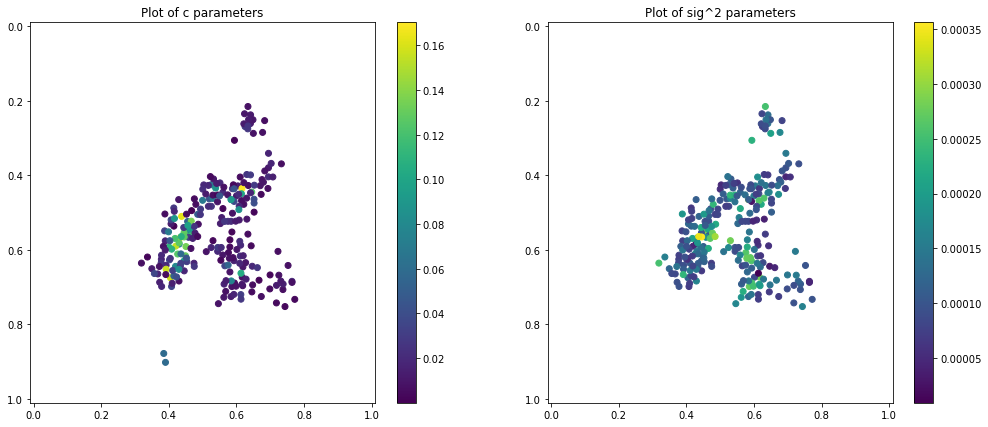

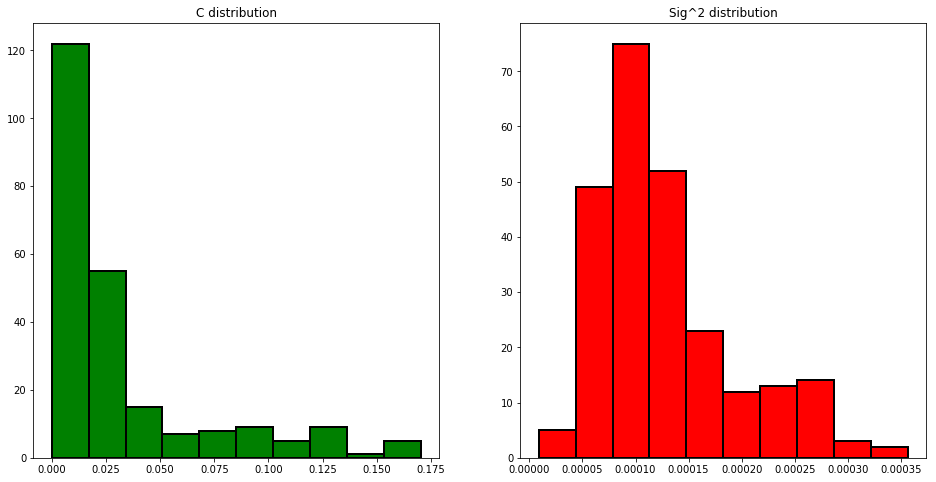

In [5]:
# common parameters
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig

# number of points of each type
Nb = 50
Nc = 250
Ne = 4*Nc-Nb

# points generation
center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
boundary_points = boundary_generation(Nb)

# right format
xc = center_points[:,0]
yc = center_points[:,1]
xe = collocation_points[:,0]
ye = collocation_points[:,1]
xb = boundary_points[:,0]
yb = boundary_points[:,1]

## visualizing the choosen points
points_plot(data, center_points=center_points, title="Center Points")
points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
#c0, sig0 = estimate_initial_guess(center_points, f, R=0.009, method='mean_dist')
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')
#c0, sig0 = _estimate_initial_guess(dfunc, data, center_points, base_level)


#solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#params_plot(c0, sig0, xc, yc)
#params_distribution_plot(c0, sig0)
elm02 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=10., lamb1=10., b=0., lamb2=1.,
                d1psi1=d1psi, d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)

nfev = 100*(len(elm02.get_params())+1)
elm_solver(elm02, method='standard', max_nfev=nfev)

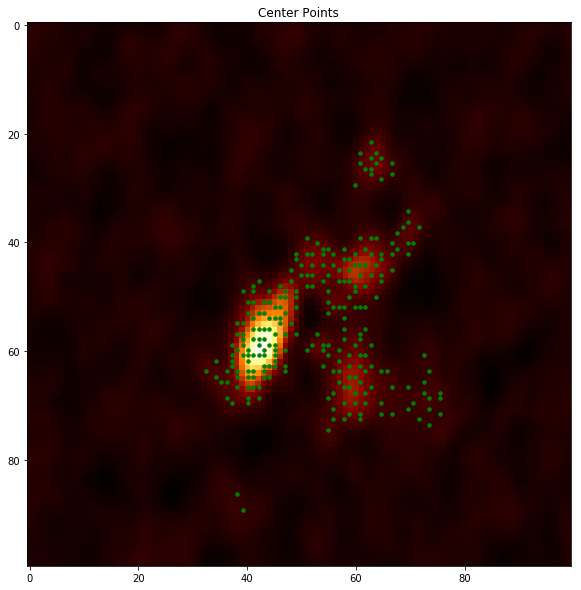

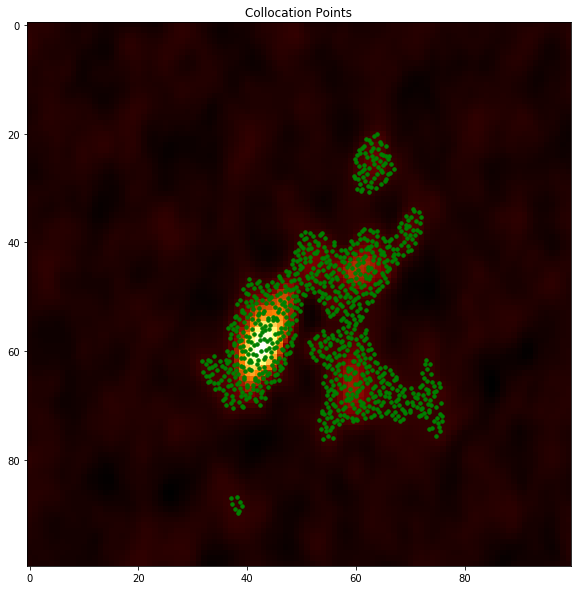


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100114

Residual stats:
Residual RMS: 0.10076056626995959
Residual Variance: 1.673770319977133e-05
Residual Entropy: 7.125422350224927
Added Flux: -0.0
Total elapsed time: 340.45537996292114 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03574333162442962
Mean min distance between collocation and center points: 0.009439262742340563

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.06965848100623612
Max min distance in the (standarized) parameters space: 0.7367222625843125


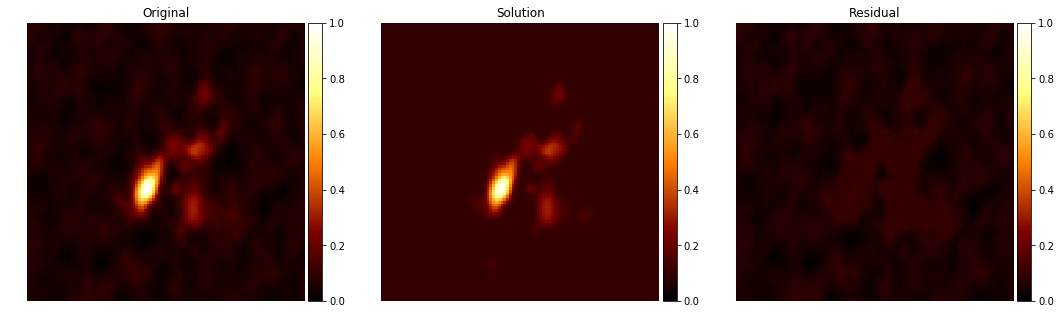

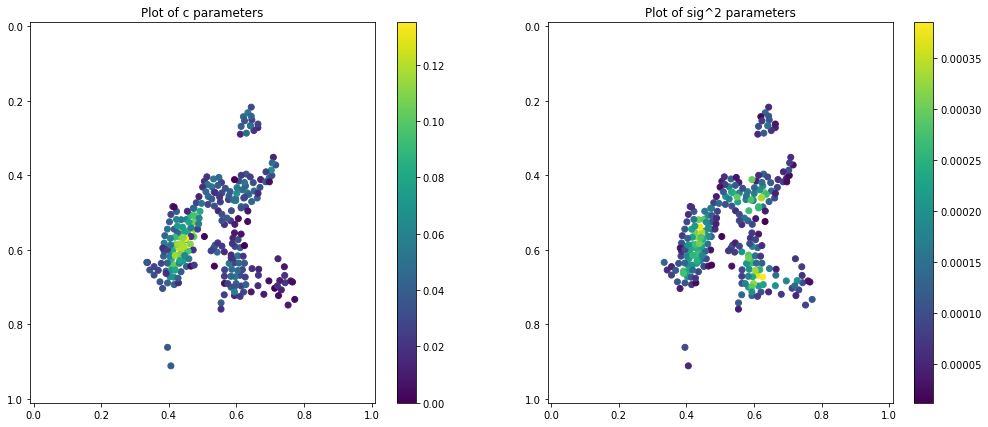

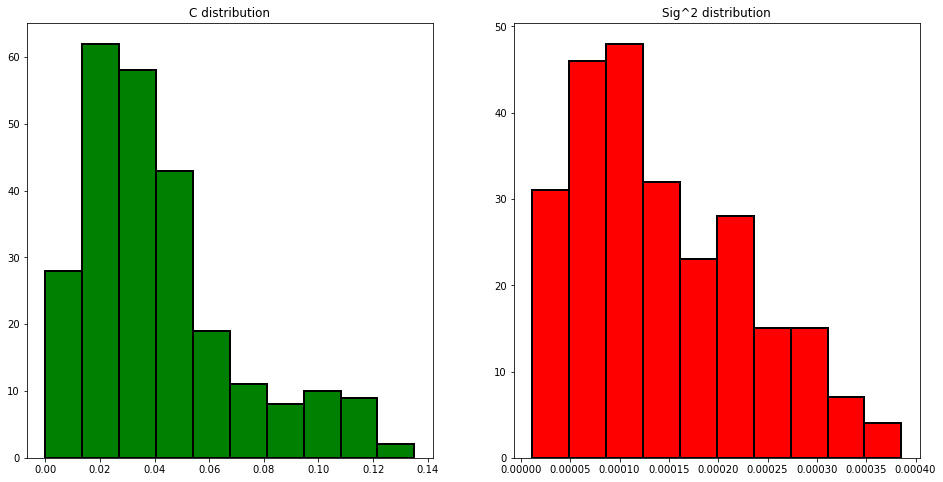

In [7]:
# common parameters
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig

# number of points of each type
Nb = 50
Nc = 250
Ne = 4*Nc-Nb

# points generation
center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
boundary_points = boundary_generation(Nb)

# right format
xc = center_points[:,0]
yc = center_points[:,1]
xe = collocation_points[:,0]
ye = collocation_points[:,1]
xb = boundary_points[:,0]
yb = boundary_points[:,1]

## visualizing the choosen points
points_plot(data, center_points=center_points, title="Center Points")
points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
#c0, sig0 = estimate_initial_guess(center_points, f, R=0.009, method='mean_dist')
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')
#c0, sig0 = _estimate_initial_guess(dfunc, data, center_points, base_level)


#solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#params_plot(c0, sig0, xc, yc)
#params_distribution_plot(c0, sig0)
elm022 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=1., lamb1=1., b=0., lamb2=1.,
                d1psi1=d1psi, d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)

nfev = 100*(len(elm022.get_params())+1)
elm_solver(elm022, method='standard', max_nfev=nfev)

## `Case 3 `:   $\alpha_1 = 0$ and $\alpha_2 = 1e-4$

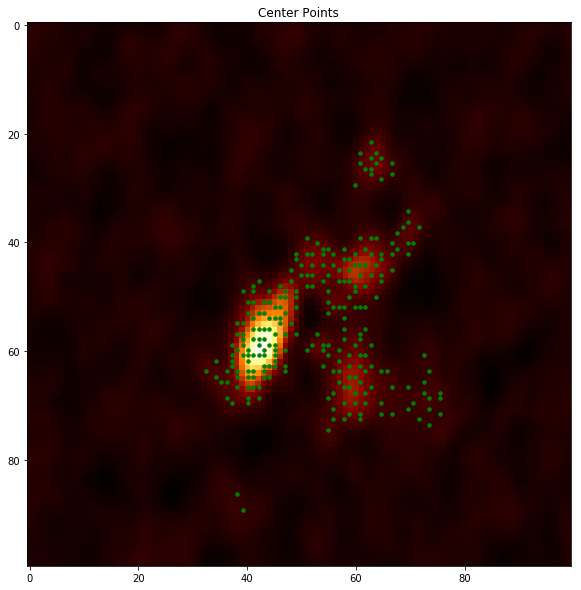

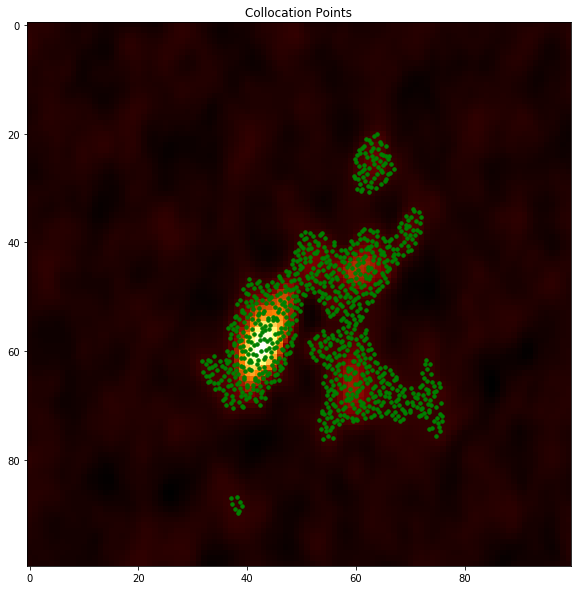


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 22037

Residual stats:
Residual RMS: 0.0955275604322089
Residual Variance: 0.0004217724294764229
Residual Entropy: 6.556759552087293
Added Flux: 0.16179314628389296
Total elapsed time: 98.06900382041931 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03159174401627394
Mean min distance between collocation and center points: 0.009835436961769643

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.07470826108311478
Max min distance in the (standarized) parameters space: 0.40541752963505057


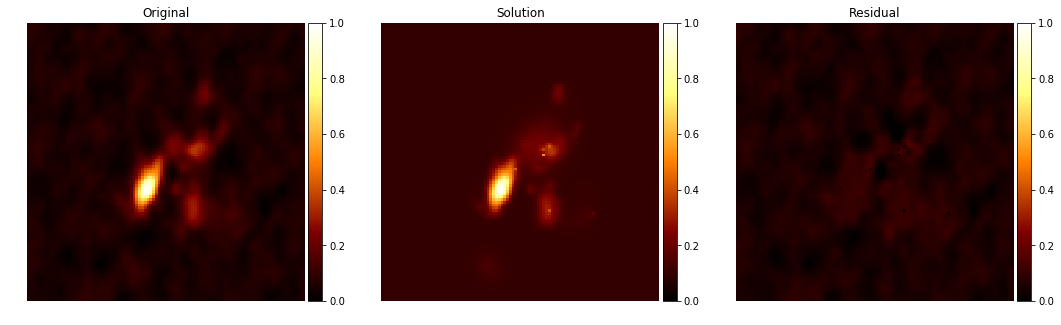

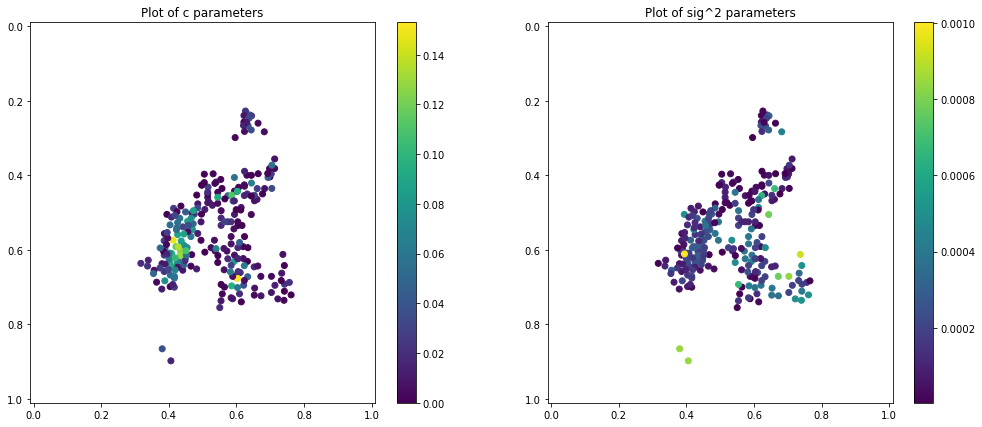

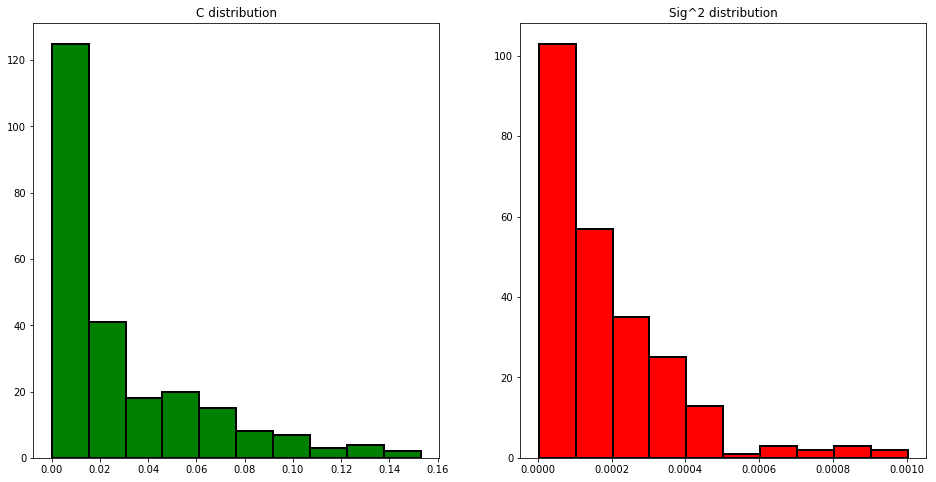

In [6]:
# common parameters
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig

# number of points of each type
Nb = 50
Nc = 250
Ne = 4*Nc-Nb

# points generation
center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
boundary_points = boundary_generation(Nb)

# right format
xc = center_points[:,0]
yc = center_points[:,1]
xe = collocation_points[:,0]
ye = collocation_points[:,1]
xb = boundary_points[:,0]
yb = boundary_points[:,1]

## visualizing the choosen points
points_plot(data, center_points=center_points, title="Center Points")
points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
#c0, sig0 = estimate_initial_guess(center_points, f, R=0.009, method='mean_dist')
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')
#c0, sig0 = _estimate_initial_guess(dfunc, data, center_points, base_level)


#solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#params_plot(c0, sig0, xc, yc)
#params_distribution_plot(c0, sig0)
elm03 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=0., lamb1=1., b=1e-3, lamb2=1.,
                d1psi1=d1psi, d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)

nfev = 100*(len(elm03.get_params())+1)
elm_solver(elm03, method='standard', max_nfev=nfev)

## `Case 4 `:   $\alpha_1 = 1$ and $\alpha_2 =1e-4$


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 7217

Residual stats:
Residual RMS: 0.20064046626582063
Residual Variance: 0.014395083149585293
Residual Entropy: 6.929528596304131
Total elapsed time: 3644.748876094818 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.02661033443376027
Mean min distance between collocation and center points: 0.00799379974084039

Homogeneity of solution:
Mean min distance in the (standarized) parameters space: 0.04973022530983419
Max min distance in the (standarized) parameters space: 0.42922643022077195


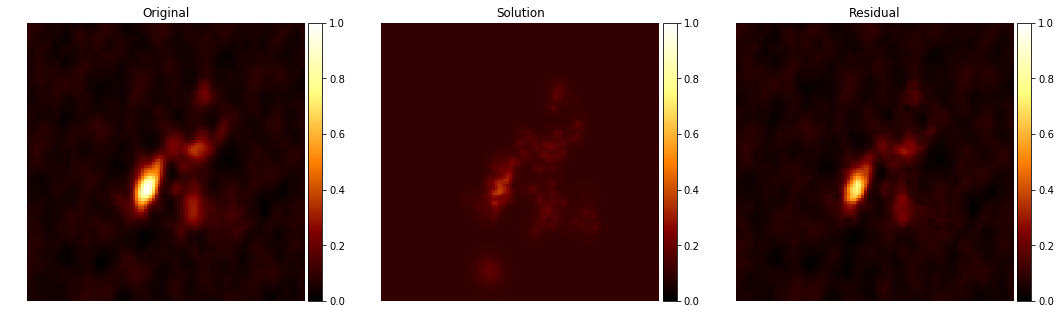

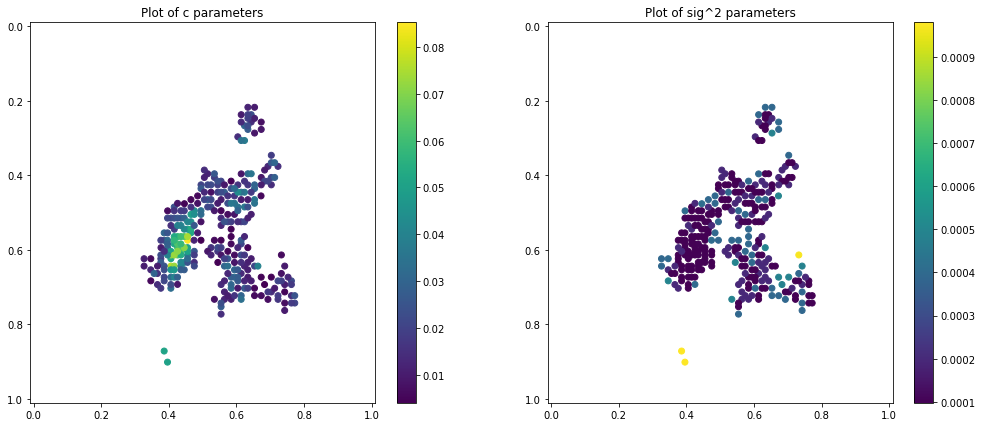

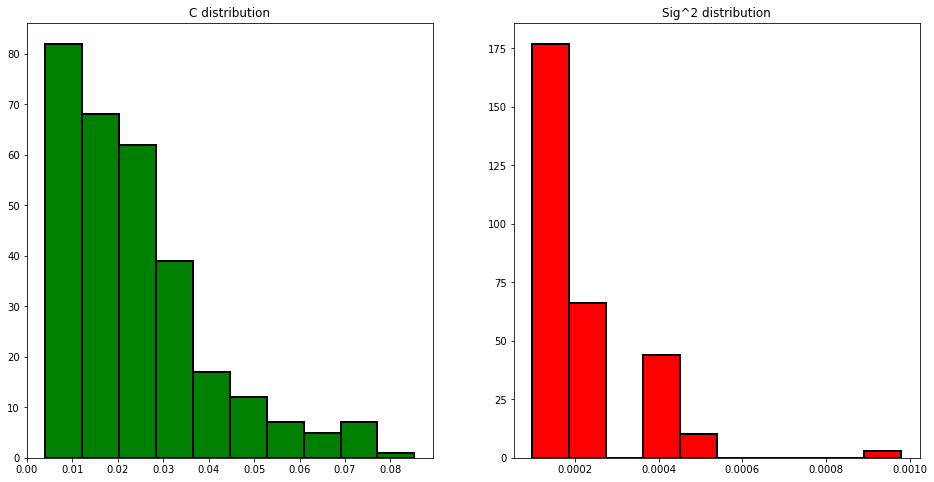

In [22]:
# common parameters
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig

# number of points of each type
Nb = 75
Nc = 300
Ne = 4*Nc-Nb

# points generation
center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
boundary_points = boundary_generation(Nb)

# right format
xc = center_points[:,0]
yc = center_points[:,1]
xe = collocation_points[:,0]
ye = collocation_points[:,1]
xb = boundary_points[:,0]
yb = boundary_points[:,1]

## visualizing the choosen points
#points_plot(data, center_points=center_points, title="Center Points")
#points_plot(data, center_points=collocation_points, title="Collocation Points")


####################################
# Initial parameters estimation
####################################
#c0, sig0 = estimate_initial_guess(center_points, f, R=0.009, method='mean_dist')
c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')
#c0, sig0 = _estimate_initial_guess(dfunc, data, center_points, base_level)


#solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#params_plot(c0, sig0, xc, yc)
#params_distribution_plot(c0, sig0)
elm04 = ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=1., lamb1=1., b=1e-3, lamb2=1.,
                d1psi1=d1psi, d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.)

nfev = 100*(len(elm04.get_params())+1)
elm_solver(elm04, method='standard', max_nfev=nfev)